In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/hp/Downloads/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [4]:
data.shape

(9994, 13)

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
data=data.drop(['Country'],axis=1)

In [9]:
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
duplicate_rows_data=data[data.duplicated()]
duplicate_rows_data.shape

(17, 12)

In [11]:
data=data.drop_duplicates()

In [12]:
duplicate_rows_data=data[data.duplicated()]
duplicate_rows_data.shape

(0, 12)

In [25]:
min_thresold, max_thresold= data.Profit.quantile([0.002,0.998])
min_thresold, max_thresold

(-1032.3930008, 1488.330661600112)

In [26]:
data2 = data[(data.Profit<max_thresold)&(data.Profit>min_thresold)]
data2.shape

(9937, 12)

In [30]:
min_thresold, max_thresold= data.Sales.quantile([0.002,0.998])
min_thresold, max_thresold

(1.247616, 4900.537680000009)

In [31]:
data2 = data[(data.Sales<max_thresold)&(data.Sales>min_thresold)]
data2.shape

(9937, 12)

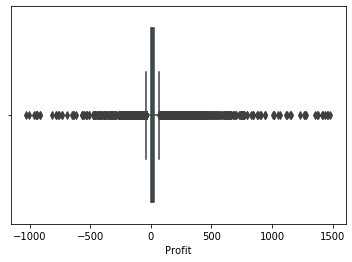

In [28]:
sns.boxplot(x='Profit',data=data2)


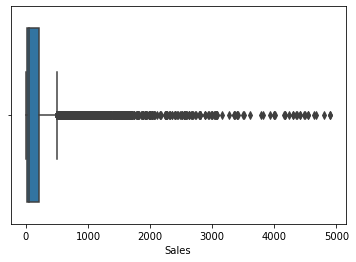

In [32]:
sns.boxplot(x='Sales',data=data2)

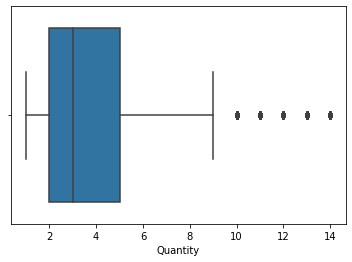

In [50]:
sns.boxplot(x='Quantity',data=data2)

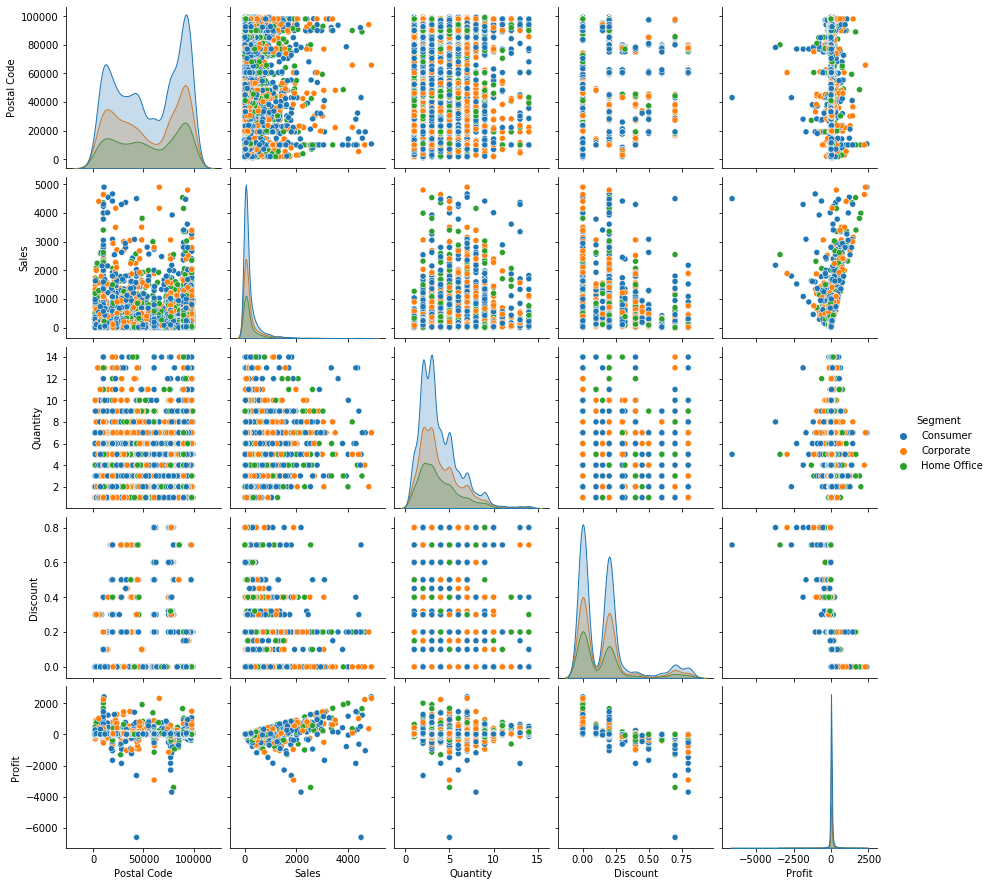

In [39]:
sns.pairplot(data2, hue='Segment')
plt.show()

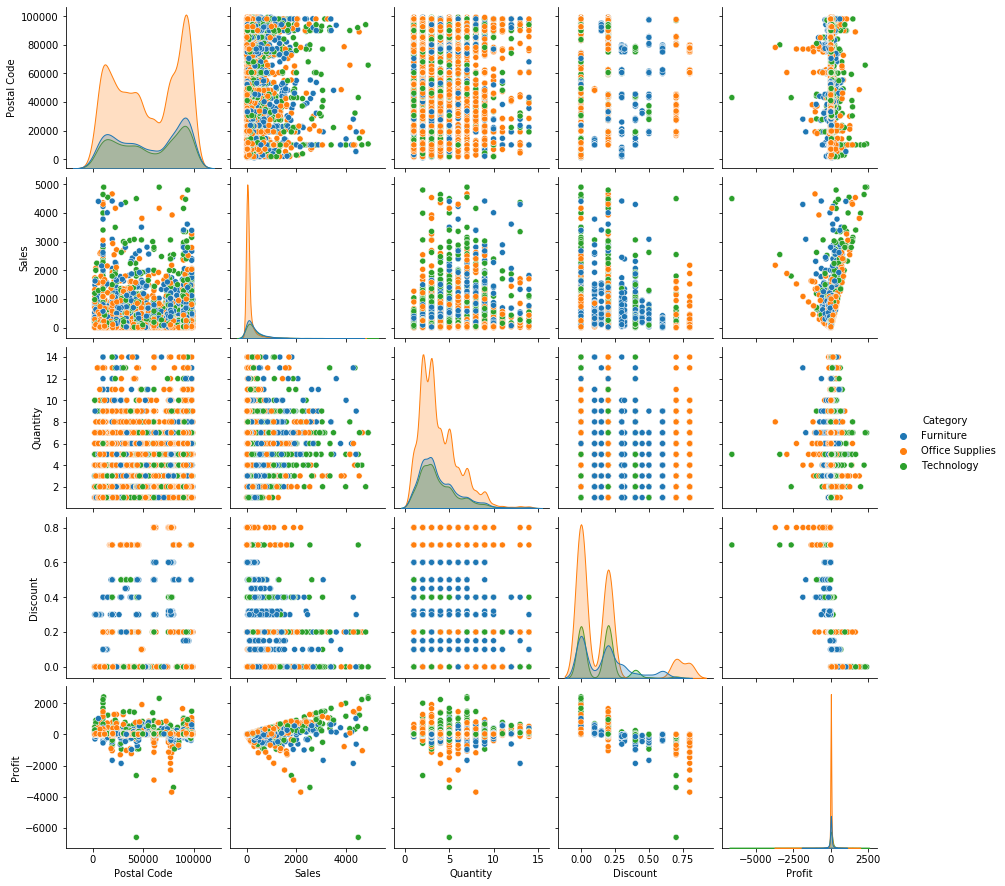

In [37]:
sns.pairplot(data2,hue='Category')
plt.show()

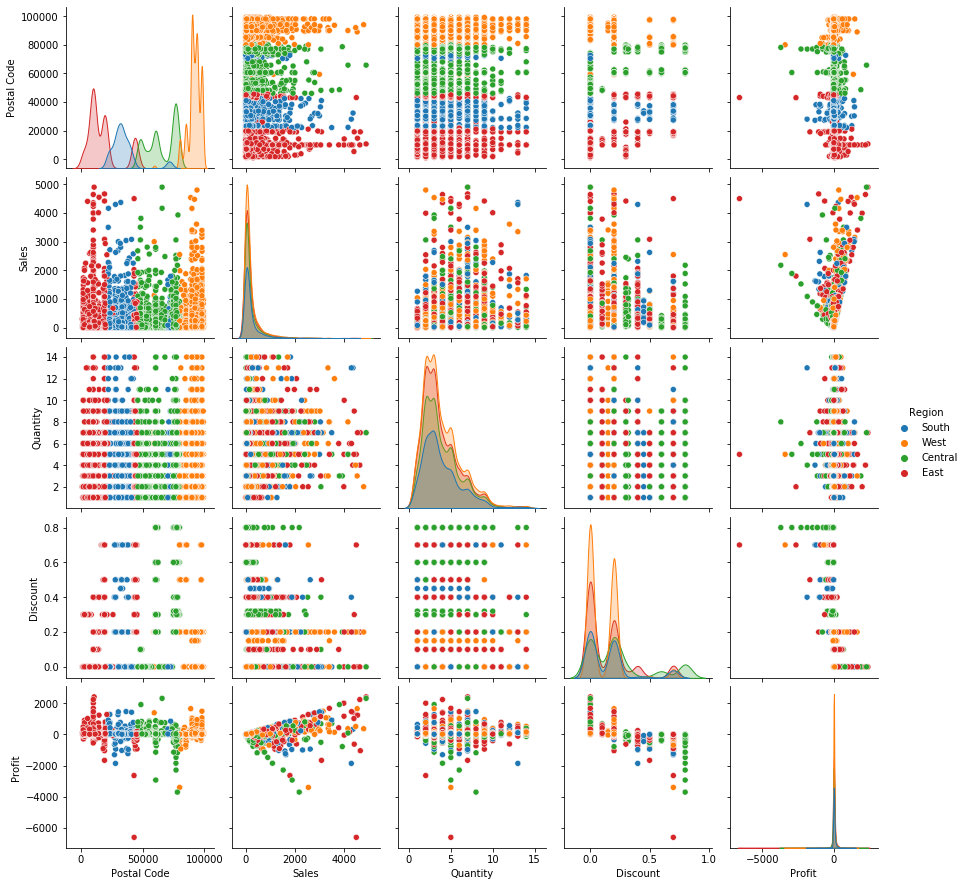

In [48]:
sns.pairplot(data2,hue='Region');
plt.show();

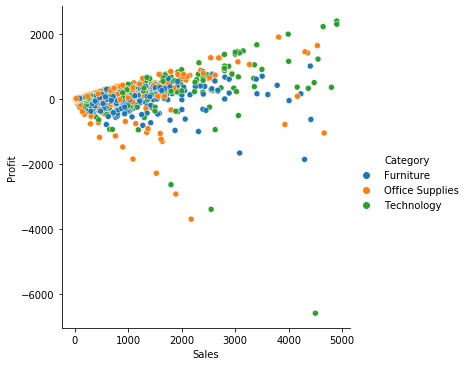

In [82]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=data2)

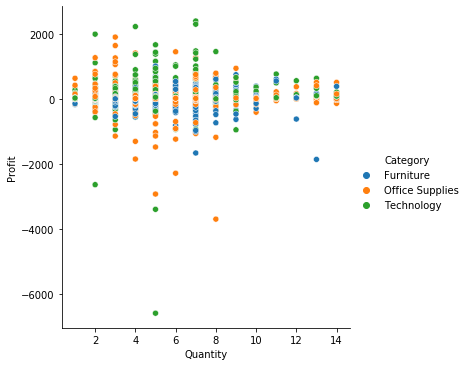

In [83]:
sns.relplot(x='Quantity',y='Profit',hue='Category',data=data2)

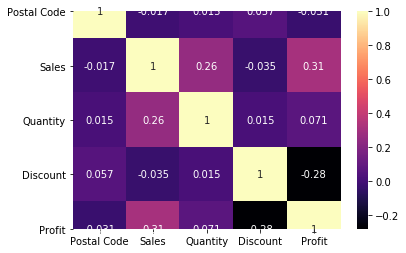

In [68]:
corelation=data2.corr()
plt.figure()
sns.heatmap(corelation,annot=True,cmap='magma')

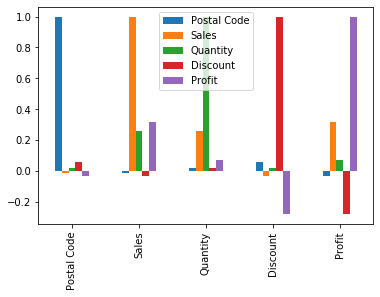

In [69]:
data2.corr().plot.bar()

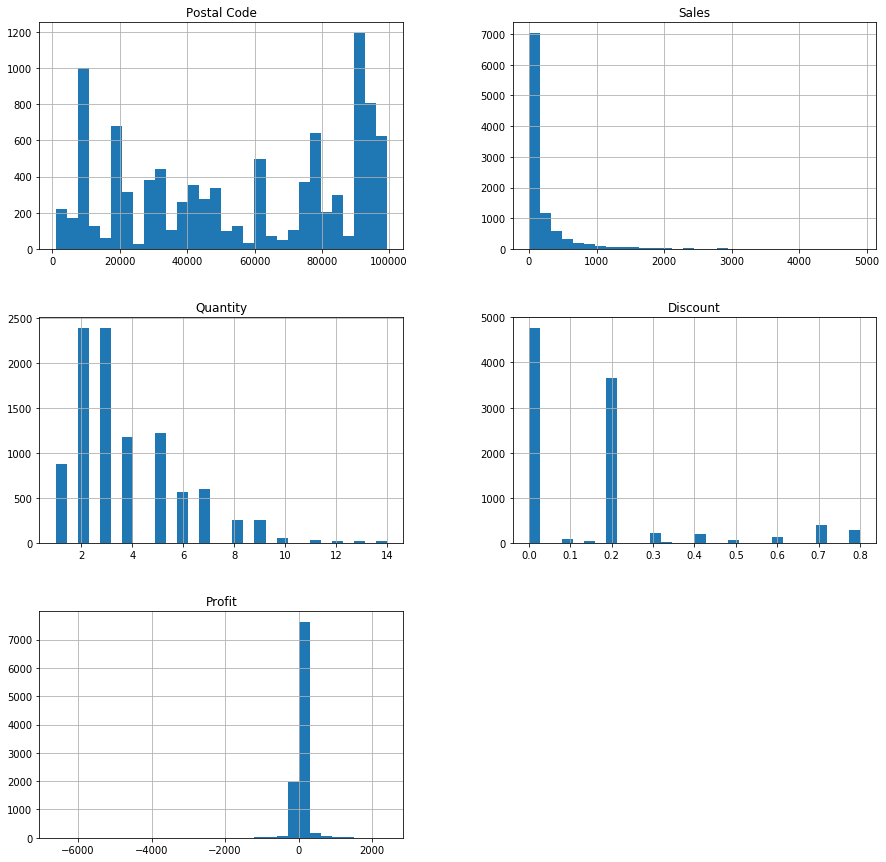

In [47]:
data2.hist(figsize=(15,15),bins=30);

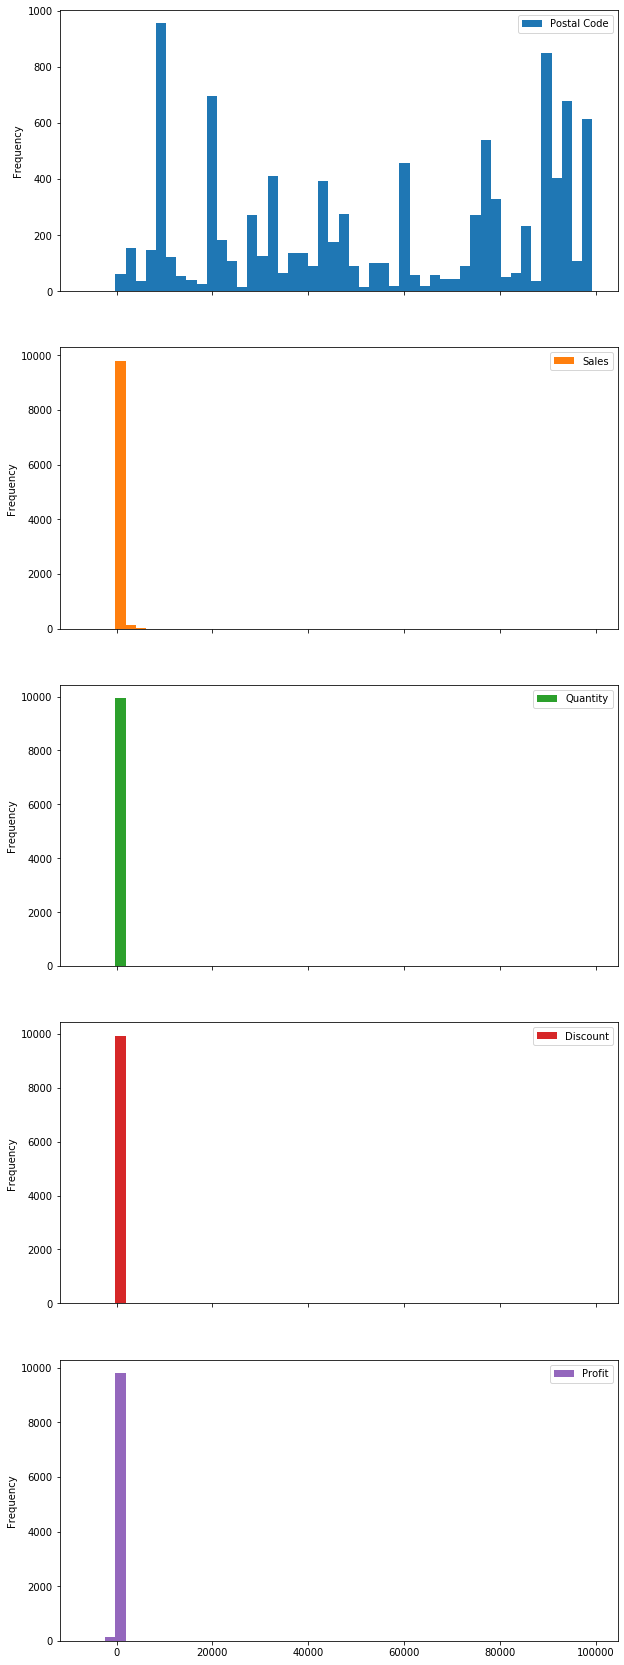

In [80]:
data2.plot.hist(figsize=(10,30),subplots=True,bins=50);

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


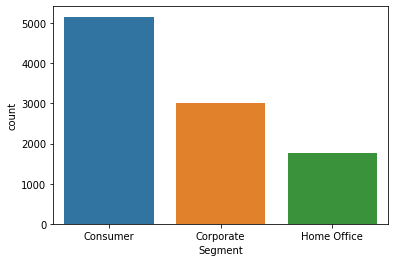

In [51]:
 sns.countplot(data2['Segment'], data=data2)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


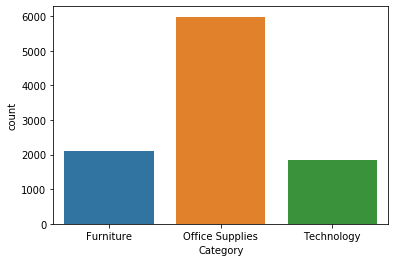

In [52]:
sns.countplot(data2['Category'], data=data2)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


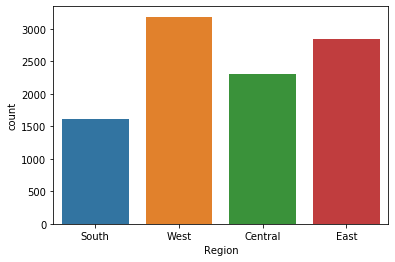

In [75]:
sns.countplot(data2['Region'], data=data2)

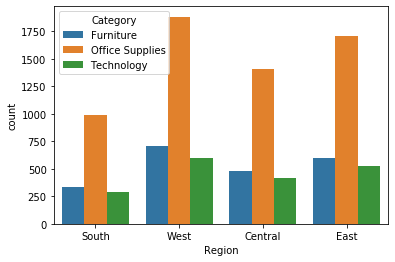

In [74]:
sns.countplot(x='Region', hue='Category', data=data2)

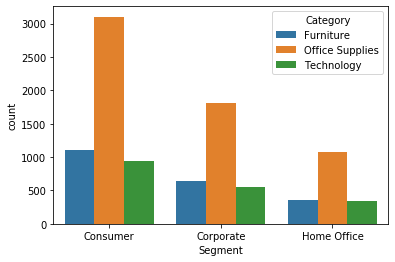

In [81]:
sns.countplot(x='Segment', hue='Category', data=data2)

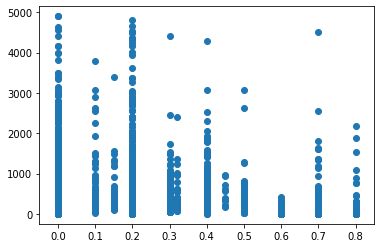

In [55]:
plt.scatter(data2['Discount'],data2['Sales'])
plt.show()

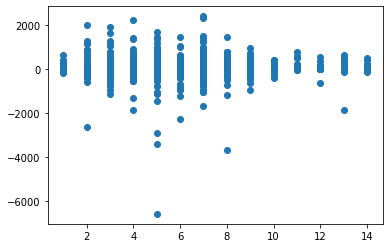

In [56]:
plt.scatter(data2['Quantity'],data2['Profit'])
plt.show()

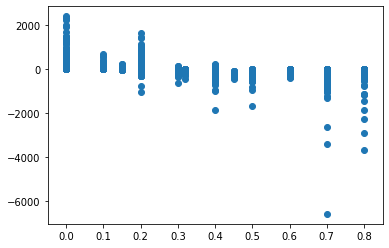

In [57]:
plt.scatter(data2['Discount'],data2['Profit'])
plt.show()

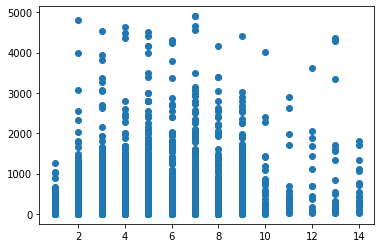

In [71]:
plt.scatter(data2['Quantity'],data2['Sales'])
plt.show()